In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [11]:
ticker = "AAPL"  # Replace with your desired ticker
start_date = "2018-01-01"
end_date = "2023-12-31"

data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [12]:
def calculate_technical_indicators(data):
    data['SMA_20'] = data['Close'].rolling(window=20).mean()
    data['EMA_20'] = data['Close'].ewm(span=20).mean()
    # Calculate MACD, RSI, VWAP, etc. (implement your desired calculations)

    # Assuming you have a function to calculate news sentiment score
    #data['Sentiment'] = calculate_news_sentiment(data)  # Replace with your function

    return data

data = calculate_technical_indicators(data)

In [15]:
# Drop rows with missing values
data.dropna(inplace=True)

# Define features and target variable
X = data[['SMA_20', 'EMA_20']]  # Add other features
y = data['High'] - data['Low']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2.057818798540196
Mean Absolute Error: 0.9699728611171647


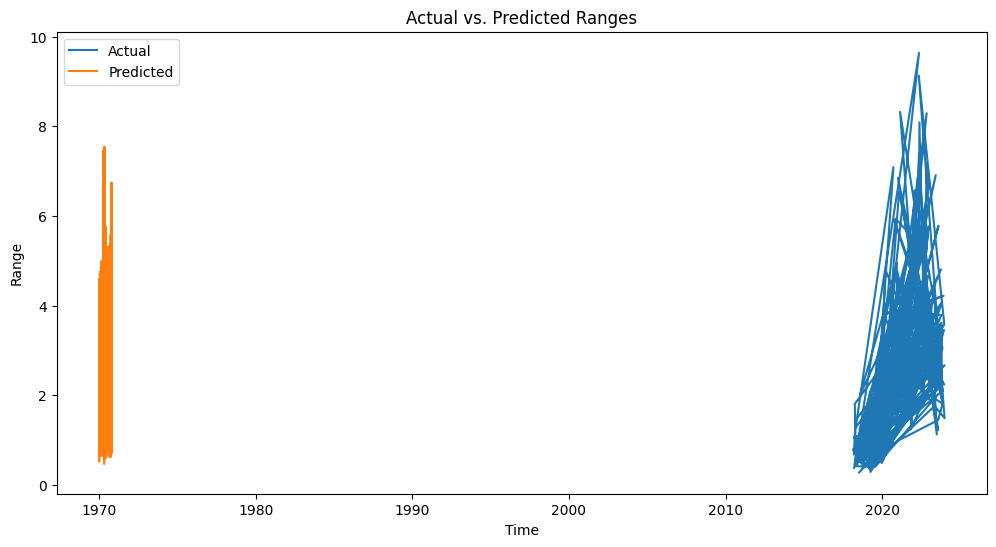

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Range')
plt.title('Actual vs. Predicted Ranges')
plt.show()